# Project: Reviews Analysis of the Movie Split

## 1.1 Scraping the data from Web using Selenium

To be run in local machine and not in Google Colab

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import pandas as pd
import numpy as np

driver = webdriver.Edge()
#For the Movie Split
#driver.get("https://www.imdb.com/title/tt4972582/reviews/?ref_=tt_ov_rt")
#For the Movie No time to Die
driver.get("https://www.imdb.com/title/tt2382320/reviews/?ref_=tt_ov_rt")
driver.implicitly_wait(0.5)

master_element = driver.find_element(By.CLASS_NAME, "lister-list")
master_list = []
def get_element_list():

	global master_list
	temp_list = master_element.find_elements(By.CLASS_NAME, "content")
	master_list.extend(temp_list)

for i in range(0,160):
	num = np.random.randint(3,5)
	time.sleep(num)
	driver.find_element(By.CLASS_NAME, "ipl-load-more__button").click()

get_element_list()

final_list = []
print(len(master_list))
for ele in master_list:
	final_list.append(ele.text)

data = pd.DataFrame(final_list)

data.to_csv('C:/Users/fkhan/OneDrive/Documents/split_reviews.csv')

# for ele in child_elements:
# 	print(ele.text)

## 1.2 Reading the data and initial checks

In [1]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Code Practice/Scrapped Dataset/split_reviews.csv')

In [2]:
data.head()

,Unnamed: 0,0
0,0,James McAvoy gives what could have potentially...
1,1,"A fantastic performance by the film's star, Ja..."
2,2,What a remarkable film! The premise of the fil...
3,3,Ahhhhhh I am so disappointed with this! I real...
4,4,I was surprised to see that this movie was rel...


In [3]:
data.shape

(1149, 2)

In [4]:
data.columns = ['Number','Review']

In [5]:
data.head()

,Number,Review
0,0,James McAvoy gives what could have potentially...
1,1,"A fantastic performance by the film's star, Ja..."
2,2,What a remarkable film! The premise of the fil...
3,3,Ahhhhhh I am so disappointed with this! I real...
4,4,I was surprised to see that this movie was rel...


In [6]:
data.set_index('Number')

,Review
Number,
0,James McAvoy gives what could have potentially...
1,"A fantastic performance by the film's star, Ja..."
2,What a remarkable film! The premise of the fil...
3,Ahhhhhh I am so disappointed with this! I real...
4,I was surprised to see that this movie was rel...
...,...
1144,I reccomend watching this movie if your into p...
1145,"I really like this movie, he played the role o..."
1146,Nothing much to say except its a marvellous ma...


## 1.3 Data Cleaning

In [7]:
data.isnull().sum()

Number      0
Review    336
dtype: int64

Clearly some people have not reviewed at all and only given a rating, hence the records are empty. We'll remove these records for now.

In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

Number    0
Review    0
dtype: int64

In [10]:
data.shape

(813, 2)

## 1.4 Removing Symbols using Regex

In [11]:
data.head()

,Number,Review
0,0,James McAvoy gives what could have potentially...
1,1,"A fantastic performance by the film's star, Ja..."
2,2,What a remarkable film! The premise of the fil...
3,3,Ahhhhhh I am so disappointed with this! I real...
4,4,I was surprised to see that this movie was rel...


In [12]:
import re
temp_list = []
temp = []
for txt in data["Review"]:
    temp.append(re.sub("[^a-zA-Z \n]",r"",txt))

#print(temp)
data['cleaned_text'] = temp

In [13]:
data['cleaned_text']

0       James McAvoy gives what could have potentially...
1       A fantastic performance by the films star Jame...
2       What a remarkable film The premise of the film...
3       Ahhhhhh I am so disappointed with this I reall...
4       I was surprised to see that this movie was rel...
                              ...                        
1144    I reccomend watching this movie if your into p...
1145    I really like this movie he played the role of...
1146    Nothing much to say except its a marvellous ma...
1147    Thanks to this film so many people with DID ge...
1148    I give this  stars because my friend gave  sta...
Name: cleaned_text, Length: 813, dtype: object

## 1.5 Removing stopwords and Converting to lowercase

In [14]:
data['cleaned_text'] = data['cleaned_text'].apply(lambda x: x.lower())

In [15]:
data['cleaned_text']

0       james mcavoy gives what could have potentially...
1       a fantastic performance by the films star jame...
2       what a remarkable film the premise of the film...
3       ahhhhhh i am so disappointed with this i reall...
4       i was surprised to see that this movie was rel...
                              ...                        
1144    i reccomend watching this movie if your into p...
1145    i really like this movie he played the role of...
1146    nothing much to say except its a marvellous ma...
1147    thanks to this film so many people with did ge...
1148    i give this  stars because my friend gave  sta...
Name: cleaned_text, Length: 813, dtype: object

In [16]:
import nltk
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [17]:
stop_words = stopwords.words('english')

In [18]:
def remove_stopwords(reviews):
  words = word_tokenize(reviews)
  temp = [word for word in words if not word in stop_words]
  return " ".join(temp)

cleaned_revs = data["cleaned_text"].apply(remove_stopwords)

In [19]:
data['cleaned_text'] = cleaned_revs

## 1.6 Sentiment Analysis on each review using VADER

In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.0 MB/s eta 0:00:00


In [ ]:
temp_list = []
neg_list = []
pos_list = []
neu_list = []
def get_sentiment_scores(record):

    sia = SentimentIntensityAnalyzer()
    sentiment_dict = sia.polarity_scores(record)

    print("Review is ", sentiment_dict['neg']*100, "% Negative")
    neg_list.append(sentiment_dict['neg']*100)
    print("Review is ", sentiment_dict['neu']*100, "% Neutral")
    neu_list.append(sentiment_dict['neu']*100)
    print("Review is ", sentiment_dict['pos']*100, "% Positive")
    pos_list.append(sentiment_dict['pos']*100)

    print("Sentence Overall Rated As", end = " ")
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")
        temp_list.append("Positive")

    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")
        temp_list.append("Negative")

    else :
        print("Neutral")
        temp_list.append("Neutral")

data["cleaned_text"].apply(get_sentiment_scores)

In [ ]:
data['Overall Sentiment'] = temp_list
data['Positive Words %'] = pos_list
data['Negative Words %'] = neg_list
data['Neutral Words %'] = neu_list

In [ ]:
data.head()

,Number,Review,cleaned_text,Overall Sentiment,Positive Words %,Negative Words %,Neutral Words %
0,0,James McAvoy gives what could have potentially...,james mcavoy gives could potentially awardwort...,Positive,21.8,7.6,70.6
1,1,"A fantastic performance by the film's star, Ja...",fantastic performance films star james mcavoy ...,Positive,27.1,14.4,58.4
2,2,What a remarkable film! The premise of the fil...,remarkable film premise film seems quite super...,Positive,27.2,11.5,61.3
3,3,Ahhhhhh I am so disappointed with this! I real...,ahhhhhh disappointed really wanted love ticks ...,Positive,23.9,14.8,61.3
4,4,I was surprised to see that this movie was rel...,surprised see movie released last year im writ...,Positive,28.7,9.8,61.4


In [ ]:
data['Review'][0]

'James McAvoy gives what could have potentially been an award-worthy performance if it had appeared in a different film.\n\nHe plays a man with multiple personalities who kidnaps three young girls as a part of a plot two of the personalities have hatched to unleash a powerful and unstoppable identity. Betty Buckley, in a better performance than the role necessarily needed, plays a therapist working with him and who begins to unravel the alarming plot. Writer/director M. Night Shyamalan, who hasn\'t made a movie I\'ve wanted to see since "Signs," crafts a nifty and effective thriller with three fourths of his film, and then sort of if not completely ruins it by taking his idea too far and pushing the supernatural elements to the point where we realize we\'re not even watching the same kind of movie we were at the beginning. This particular story, and especially McAvoy\'s performance, would have been compelling enough without Shyamalan\'s characteristic inability to understand when he\'s

## 1.7 Plotting the Sentiments

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

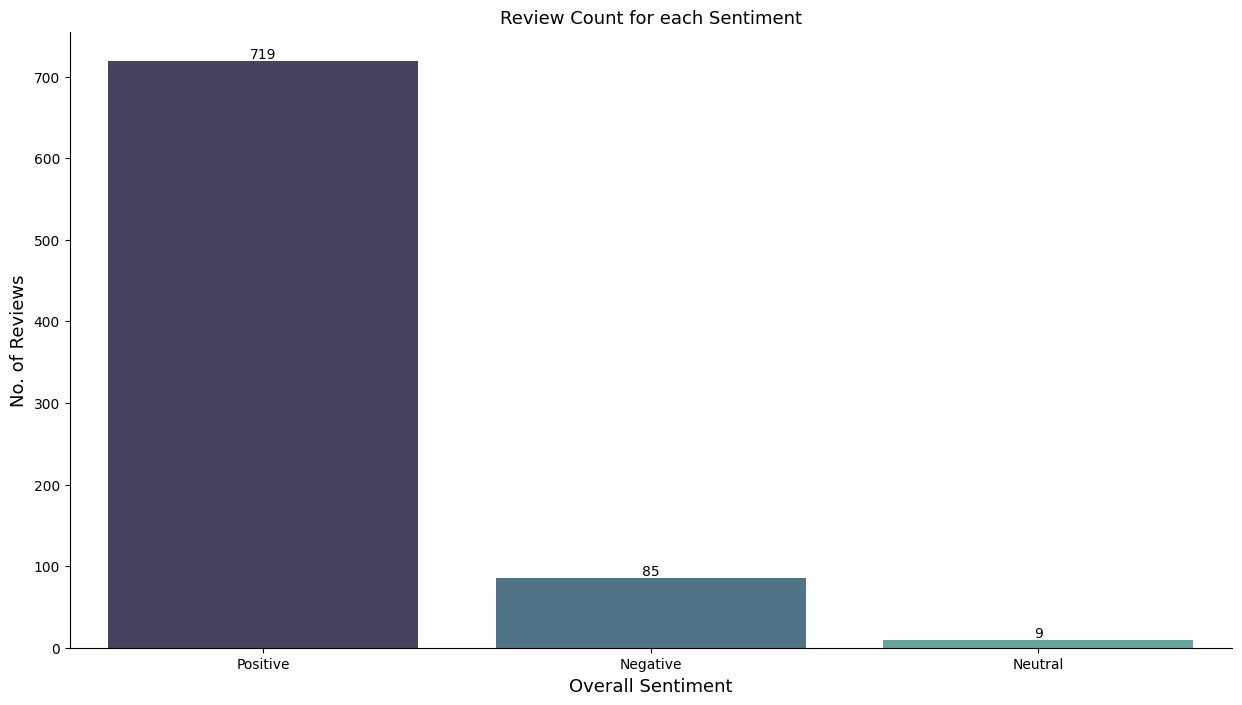

In [ ]:
plt.figure(figsize=(15,8),dpi=100)
p = sns.countplot(data=data,x=data["Overall Sentiment"],palette="mako",saturation=0.5)
vals = data["Overall Sentiment"].value_counts(ascending=False).values
p.bar_label(container=p.containers[0],labels=vals)
sns.despine(right=True,top=True)
plt.title("Review Count for each Sentiment").set_fontsize(13)
plt.xlabel("Overall Sentiment").set_fontsize(13)
plt.ylabel("No. of Reviews").set_fontsize(13);

## 1.8 Stemming

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [ ]:
def stem_words(reviews):
  words = word_tokenize(reviews)
  temp = [ps.stem(word) for word in words]
  return " ".join(temp)

stem_revs = data["cleaned_text"].apply(stem_words)

In [ ]:
data['cleaned_text'] = stem_revs

## 1.9 Lemmatization

In [ ]:
from nltk import WordNetLemmatizer
lm = WordNetLemmatizer()

In [ ]:
def lemma(reviews):
  words = word_tokenize(reviews)
  temp = [lm.lemmatize(word) for word in words]
  return " ".join(temp)
lm_revs = data["cleaned_text"].apply(lemma)

In [ ]:
data["cleaned_text"] = lm_revs

## 1.10 Count Vectorization using Tf-Idf Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
bow_vector = TfidfVectorizer(max_df=0.90,
                            min_df=2,
                            max_features = 10000,
                            stop_words = 'english')

In [ ]:
bow = bow_vector.fit_transform(data['cleaned_text'])

In [ ]:
bow_vector_names = bow_vector.get_feature_names_out()

In [ ]:
model_data = pd.DataFrame(bow.toarray(),columns=bow_vector_names)

In [ ]:
model_data

,abandon,abduct,abducte,abductor,abil,abl,abli,absenc,absent,absolut,...,yesterday,youd,youll,young,younger,youngster,youth,youv,zone,zoo
0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.095829,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.158088,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.068155,0.0,0.0,0.076977,0.069610,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.123000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.000000,0.110952,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
809,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
810,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
811,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## 1.11 Model Buidling: Latent Dirichlet Allocation

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from pprint import pprint

In [ ]:
tok_comments = data["cleaned_text"].apply(lambda x: x.split())
id2word = corpora.Dictionary(tok_comments)

In [ ]:
corpus = [id2word.doc2bow(txt) for txt in tok_comments]

In [ ]:
#model building
lda = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='symmetric',
                                           per_word_topics=True,
                                           eta = 0.6)

In [ ]:
pprint(lda.print_topics())

[(0,
  '0.000*"mock" + 0.000*"redemptioncomeback" + 0.000*"pervas" + '
  '0.000*"narcissist" + 0.000*"vouch" + 0.000*"midichlorian" + '
  '0.000*"fingernail" + 0.000*"corpu" + 0.000*"plier" + 0.000*"dose"'),
 (1,
  '0.021*"movi" + 0.019*"film" + 0.013*"person" + 0.010*"shyamalan" + '
  '0.010*"split" + 0.010*"one" + 0.010*"mcavoy" + 0.008*"charact" + '
  '0.007*"like" + 0.006*"make"'),
 (2,
  '0.001*"prison" + 0.001*"licens" + 0.000*"gasp" + 0.000*"abhorr" + '
  '0.000*"autism" + 0.000*"boot" + 0.000*"empathis" + 0.000*"macabr" + '
  '0.000*"interim" + 0.000*"slash"'),
 (3,
  '0.000*"reccomend" + 0.000*"depress" + 0.000*"standalon" + 0.000*"acot" + '
  '0.000*"damm" + 0.000*"fierc" + 0.000*"cinemat" + 0.000*"greast" + '
  '0.000*"destigmatis" + 0.000*"recur"'),
 (4,
  '0.001*"smith" + 0.001*"navig" + 0.001*"propos" + 0.001*"nolan" + '
  '0.001*"plod" + 0.001*"gestur" + 0.001*"wander" + 0.001*"concert" + '
  '0.001*"tile" + 0.001*"multicolor"'),
 (5,
  '0.001*"amongst" + 0.001*"sin" + 0

## 1.12 Model Evaluation

In [ ]:
print('\nPerplexity : ', lda.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda, texts=tok_comments, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity :  -7.1772284232361505

Coherence Score:  0.4701821960258588


In [ ]:
import wordcloud
import matplotlib.pyplot as plt


In [ ]:
temp_data = ""

In [ ]:
for com in data["cleaned_text"]:
  temp_data = " ".join([temp_data,com])

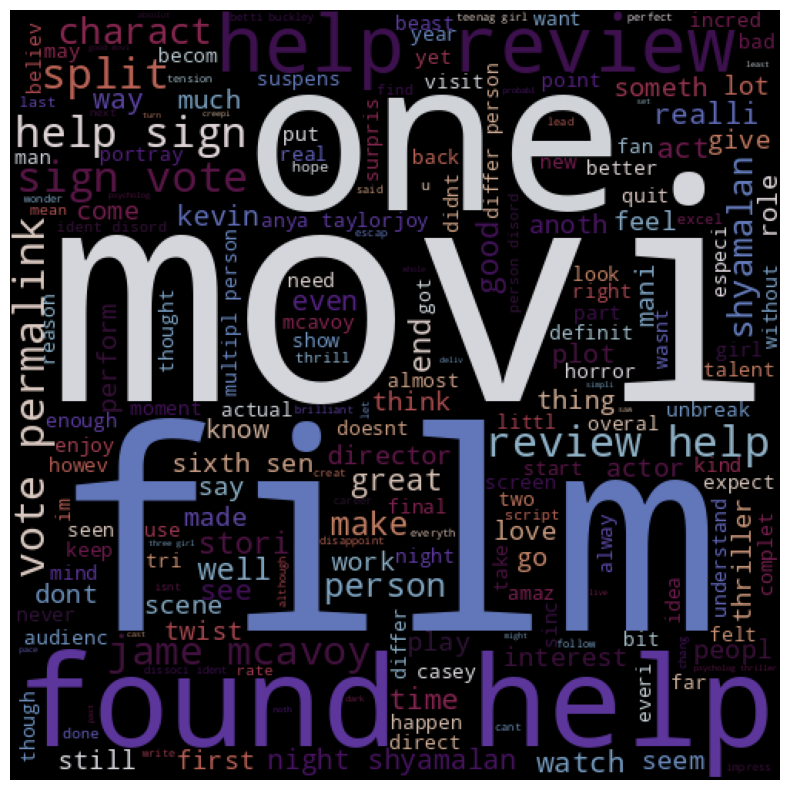

In [ ]:
plt.figure(figsize=(10, 10),dpi=100)
wordcloud = wordcloud.WordCloud(width = 500, height = 500, colormap="twilight",  random_state=10).generate(temp_data)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()